<a href="https://colab.research.google.com/github/prithusuresh/CuCo/blob/master/detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!pip3 install numpy
!apt-get install python-opencv -y
!pip install cython

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-

In [0]:
# Clean up the directory
%cd /content/
%rm -rf darkflow
# Clone the darkflow repository
!git clone https://github.com/thtrieu/darkflow
# Change into the darkflow dir and install darkflow with pip
%cd darkflow
!python setup.py build_ext --inplace

/content
Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 45.82 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.
/content/darkflow
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cyth

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
import pandas as pd
def done(identified):
  root = 'Looks like you have these Ingredients: '
  for i in identified:
    root=root+i+', '
  print (root)
  df = pd.read_csv('/content/gdrive/My Drive/recipes/recipes.csv')
  df.RECIPE = df.RECIPE.astype(str)
  df.index = df.INGREDIENT
  del df['INGREDIENT']
  recipes = []
  for i in identified: 
    templist=[]
    temp = df.loc[i,'RECIPE']
    temp = temp.split(',')
    for j in temp:
      recipes.append(j)
  recipes=list(set(recipes))
  
  print ('Here are some of the dishes you can cook using what you have: ')
  notneeded = list(set(labels)-set(identified))
  for i in recipes:
        
    print (i)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import tensorflow
import cv2

from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
options = {'model':'cfg/yolo.cfg','load':'/content/gdrive/My Drive/yolov2.weights','threshold':0.1,'gpu': 1.0 }
tfnet = TFNet(options)


W0829 04:18:47.198139 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0829 04:18:47.201145 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0829 04:18:47.206887 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0829 04:18:47.210416 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0829 04:18:47.213627 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/buil

Parsing cfg/yolo.cfg
Loading /content/gdrive/My Drive/yolov2.weights ...


W0829 04:18:47.754933 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:105: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 04:18:47.762102 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:70: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0829 04:18:47.763658 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:71: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0829 04:18:47.781023 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:84: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0829 04:18:47.859206 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/simple.py:106: The name tf.nn.max_pool is de

Successfully identified 203934260 bytes
Finished in 0.5243773460388184s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | 

W0829 04:18:52.026716 140243150538624 deprecation.py:506] From /content/darkflow/darkflow/net/ops/convolution.py:28: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 19, 19, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 19, 19, 1280)


W0829 04:18:52.641915 140243150538624 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:132: The name tf.GPUOptions is deprecated. Please use tf.compat.v1.GPUOptions instead.



 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 425)
-------+--------+----------------------------------+---------------
GPU mode with 1.0 usage
Finished in 10.230254411697388s



IMG_20190404_153943.jpg


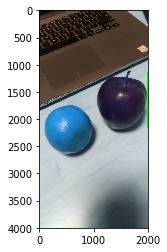

Looks like you have these Ingredients: orange, apple, 
Here are some of the dishes you can cook using what you have: 
https://www.wordsofdeliciousness.com/carrot-orange-apple-banana-ginger-smoothie/
http://allrecipes.co.uk/recipe/36124/apple--banana-and-orange-juice-smoothie.aspx
https://www.allrecipes.com/recipe/25552/apple-banana-cupcakes/?internalSource=hub%20recipe&referringContentType=Search
https://www.countryliving.com/food-drinks/a24280381/cranberry-apple-hand-pies-recipe/


In [0]:
cucoTestPath = '/content/gdrive/My Drive/Find my recipe/'
labels = ['apple','banana','orange','carrot']
file =  os.listdir(cucoTestPath)[-2]
print (file)
img = cv2.imread(cucoTestPath+file,cv2.IMREAD_COLOR)


results = tfnet.return_predict(img)

identified = []
for i in range(len(results)):
  if results[i]['label'] in labels:
    identified.append(results[i]['label'])
    tl = (results[i]['topleft']['x'],results[i]['topleft']['y'])
    br = (results[i]['bottomright']['x'],results[i]['bottomright']['y'])
    label = results[i]['label'] 
    img = cv2.rectangle(img,tl,br,(0,255,0),2)
  
    img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
  


plt.show()
identified = list(set(identified))
done(identified)